<a href="https://colab.research.google.com/github/soumikdalei/Machine-Learning-projects/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the dataset**

In [19]:
from tensorflow.keras.datasets import mnist

In [20]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

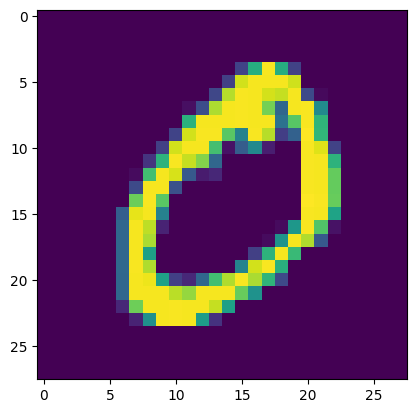

In [21]:
import matplotlib.pyplot as plt
plt.imshow(train_images[1])

In [22]:
train_images.argmax(),train_images.argmin()

(np.int64(161), np.int64(0))

In [23]:
test_images.argmax(),test_images.argmin(),train_images.shape,test_images.shape

(np.int64(355), np.int64(0), (60000, 28, 28), (10000, 28, 28))

In [24]:
train_data_norm=train_images/161.0
test_data_norm=test_images/355.0

**Training model 1**

In [25]:
import tensorflow as tf
tf.random.set_seed(42)
model_1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
lr_scheduler=tf.keras.callbacks.LearningRateScheduler(lambda epoch:1e-3*10**(epoch/20))
history_1=model_1.fit(train_data_norm,train_labels,epochs=20,callbacks=[lr_scheduler],validation_data=(test_data_norm,test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3768 - loss: 1.6072 - val_accuracy: 0.6613 - val_loss: 1.0934 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7255 - loss: 0.8142 - val_accuracy: 0.7953 - val_loss: 0.8259 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8234 - loss: 0.5910 - val_accuracy: 0.8188 - val_loss: 0.7267 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8437 - loss: 0.5328 - val_accuracy: 0.8227 - val_loss: 0.6935 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8538 - loss: 0.5047 - val_accuracy: 0.8263 - val_loss: 0.6717 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8609 - loss: 0.4885 - val_accuracy: 0.8268 - val_loss: 0.6645 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8639 - 

**Finding the perfect learning rate for model**

Text(0.5, 0, 'Learning Rate')

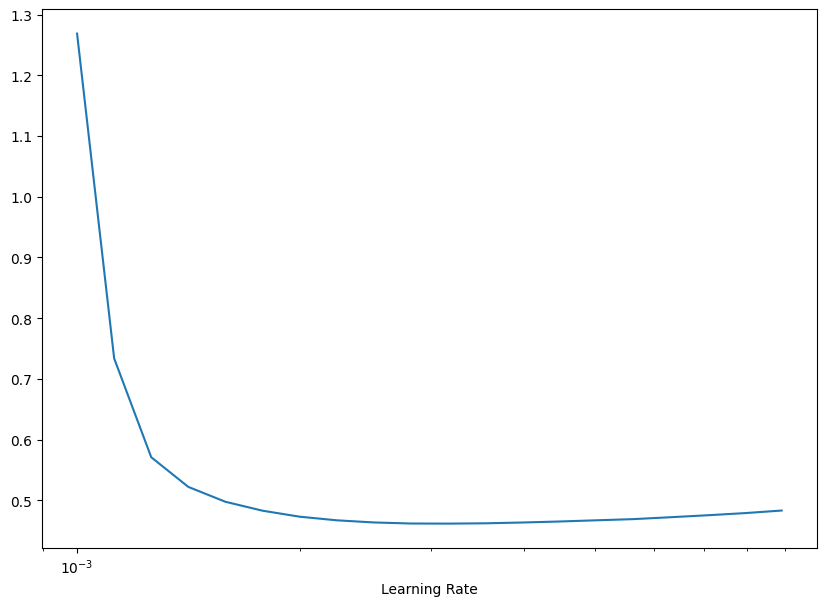

In [26]:
import numpy as np
import matplotlib.pyplot as plt
lrs=1e-3*(10**(tf.range(20)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history_1.history["loss"])
plt.xlabel("Learning Rate")

**Training the 2nd model with the ideal learning rate**

In [27]:
tf.random.set_seed(42)
model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_2=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4608 - loss: 1.4779 - val_accuracy: 0.6947 - val_loss: 1.0508
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7628 - loss: 0.7825 - val_accuracy: 0.6749 - val_loss: 1.0011
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7855 - loss: 0.7152 - val_accuracy: 0.6426 - val_loss: 0.9795
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8121 - loss: 0.6525 - val_accuracy: 0.6489 - val_loss: 0.9503
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8267 - loss: 0.6090 - val_accuracy: 0.6474 - val_loss: 0.9479
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8338 - loss: 0.5828 - val_accuracy: 0.6474 - val_loss: 0.9452
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8384 - loss: 0.5668 - val_accuracy: 0.6490 - val_loss: 0.9398
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8425 - loss: 0.5547 - 

**As model 2 reached an accuracy of only 84% so i am trying a new model named as model 3 by increasing one hidden layer**

In [28]:
tf.random.set_seed(42)
model_3=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_3=model_3.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2662 - loss: 1.9396 - val_accuracy: 0.3346 - val_loss: 1.6490
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5759 - loss: 1.1926 - val_accuracy: 0.3314 - val_loss: 1.6626
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6606 - loss: 1.0257 - val_accuracy: 0.3637 - val_loss: 1.5468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6818 - loss: 0.9707 - val_accuracy: 0.3960 - val_loss: 1.4909
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6932 - loss: 0.9459 - val_accuracy: 0.4175 - val_loss: 1.4666
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6995 - loss: 0.9298 - val_accuracy: 0.4286 - val_loss: 1.4553
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7059 - loss: 0.9169 - val_accuracy: 0.4402 - val_loss: 1.4396
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7117 - loss: 0.9057 - 

**So we got an accuracy of 88% in model 3 but it is not enough so i am trying model 4 with incresing number of neurons per hidden layer**

In [29]:
tf.random.set_seed(42)
model_4=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(6,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_4=model_4.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5673 - loss: 1.2557 - val_accuracy: 0.8573 - val_loss: 0.7161
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8644 - loss: 0.4772 - val_accuracy: 0.8690 - val_loss: 0.6299
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8819 - loss: 0.4200 - val_accuracy: 0.8721 - val_loss: 0.5992
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8901 - loss: 0.3910 - val_accuracy: 0.8757 - val_loss: 0.5689
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8976 - loss: 0.3623 - val_accuracy: 0.8773 - val_loss: 0.5441
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9034 - loss: 0.3428 - val_accuracy: 0.8774 - val_loss: 0.5302
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9070 - loss: 0.3304 - val_accuracy: 0.8748 - val_loss: 0.5203
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9100 - loss: 0.3222 - 

**In model 4 we got an accuracy of 91% but as our goal is 99% so i amtrying model 5 with increasing neurons per hidden layer**

In [30]:
tf.random.set_seed(42)
model_5=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_5=model_5.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6504 - loss: 1.0195 - val_accuracy: 0.8984 - val_loss: 0.5258
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9053 - loss: 0.3175 - val_accuracy: 0.9121 - val_loss: 0.4375
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.9229 - loss: 0.2674 - val_accuracy: 0.9204 - val_loss: 0.3962
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9297 - loss: 0.2426 - val_accuracy: 0.9226 - val_loss: 0.3721
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9338 - loss: 0.2271 - val_accuracy: 0.9260 - val_loss: 0.3538
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9365 - loss: 0.2168 - val_accuracy: 0.9281 - val_loss: 0.3429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9396 - loss: 0.2090 - val_accuracy: 0.9268 - val_loss: 0.3368
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9410 - loss: 0.2030 

**Model 5 slightly performed better with 94% accuracy so trying another model named model 6 by increasing one more hidden layer**

In [31]:
tf.random.set_seed(42)
model_6=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_6.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_6=model_6.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.6986 - loss: 0.9098 - val_accuracy: 0.8966 - val_loss: 0.5167
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9054 - loss: 0.3218 - val_accuracy: 0.9081 - val_loss: 0.4431
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9211 - loss: 0.2698 - val_accuracy: 0.9091 - val_loss: 0.4078
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9296 - loss: 0.2435 - val_accuracy: 0.9159 - val_loss: 0.3783
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9329 - loss: 0.2274 - val_accuracy: 0.9177 - val_loss: 0.3603
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9362 - loss: 0.2155 - val_accuracy: 0.9198 - val_loss: 0.3454
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9396 - loss: 0.2066 - val_accuracy: 0.9238 - val_loss: 0.3321
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9414 - loss: 0.1998 - 

**In model 6 we got same 94% so in model 7 i increased the no of neurons per hidden layer to 100 in 2 and 10 in 1**

In [32]:
tf.random.set_seed(42)
model_7=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])
model_7.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
history_7=model_7.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8457 - loss: 0.5196 - val_accuracy: 0.9603 - val_loss: 0.2637
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9641 - loss: 0.1220 - val_accuracy: 0.9679 - val_loss: 0.1786
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9761 - loss: 0.0797 - val_accuracy: 0.9697 - val_loss: 0.1530
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9821 - loss: 0.0577 - val_accuracy: 0.9704 - val_loss: 0.1261
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9849 - loss: 0.0461 - val_accuracy: 0.9718 - val_loss: 0.1207
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9889 - loss: 0.0360 - val_accuracy: 0.9763 - val_loss: 0.0983
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9902 - loss: 0.0303 - val_accuracy: 0.9733 - val_loss: 0.0964
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9902 - loss: 0.029

In [33]:
y_preds=model_7.predict(test_data_norm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**A function for showing that wheter the predicted value is same as true labels**

In [34]:
def plot_random_image(model, images, true_labels, classes):

  i = random.randint(0, len(images))


  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]


  plt.imshow(target_image, cmap=plt.cm.binary)


  if pred_label == true_label:
    color = "green"
  else:
    color = "red"


  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


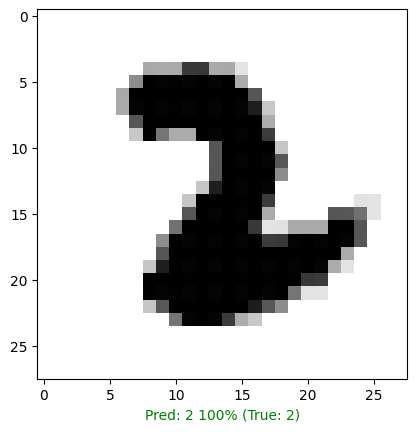

In [35]:
import random
import tensorflow as tf
import matplotlib.pyplot as plt


classes = [str(i) for i in range(10)]


plot_random_image(model_7, test_data_norm, test_labels, classes)

**Making the confusion matrix look pretty and printing it**

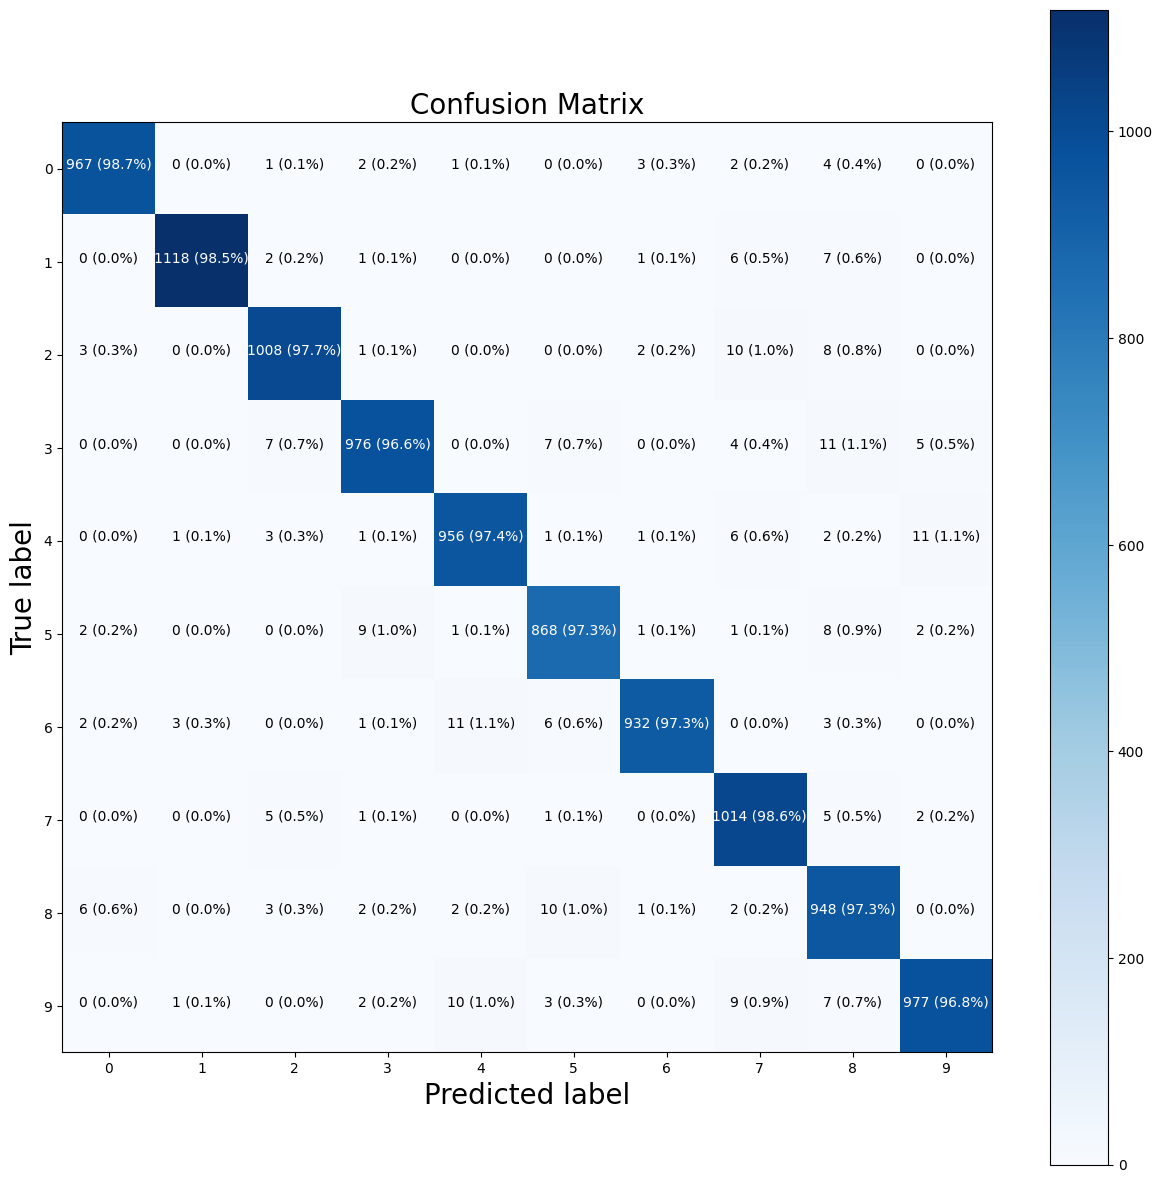

In [36]:

import itertools
from sklearn.metrics import confusion_matrix

figsize = (15, 15)

cm = confusion_matrix(test_labels, tf.argmax(y_preds, axis=1))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
n_classes = cm.shape[0]

fig, ax = plt.subplots(figsize=figsize)

cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)


ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()


ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max() + cm.min()) / 2.


for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=10)

In [37]:
model_7.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 269,162 (1.03 MB)

 Trainable params: 89,720 (350.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 179,442 (700.95 KB)

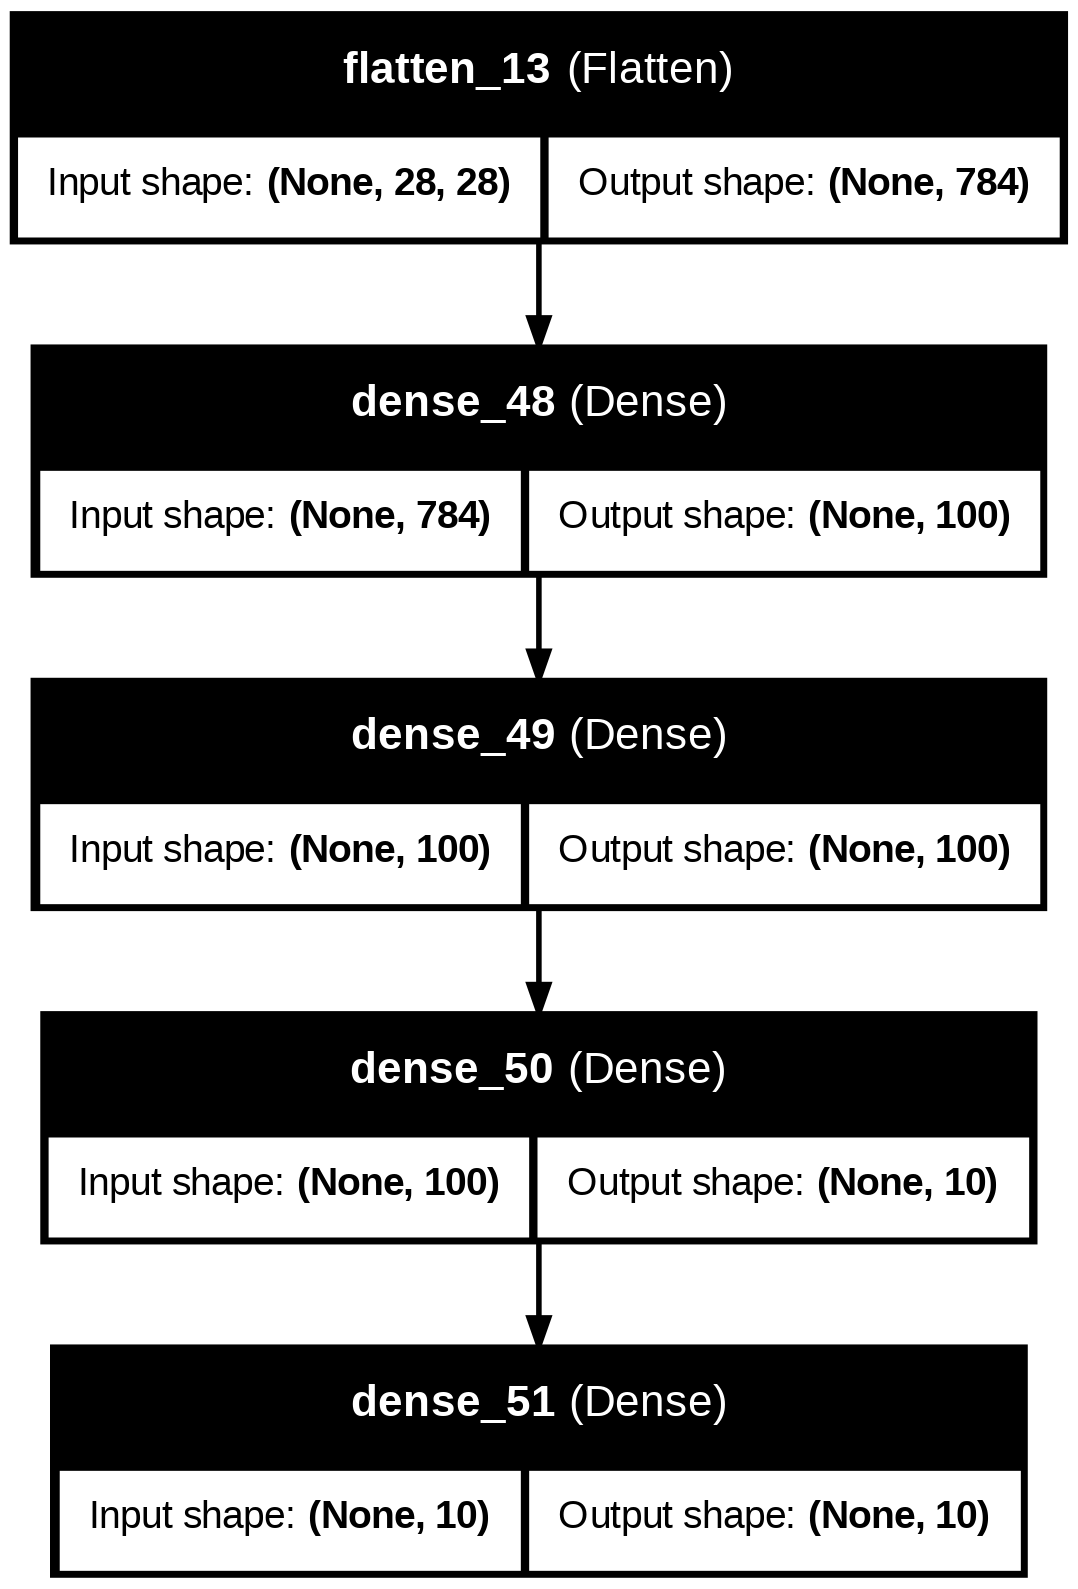

In [47]:
from tensorflow.keras.utils import plot_model

plot_model(model_7, show_shapes=True, show_layer_names=True)
